## Project Report for Motorcycle Helmet Detection
### Participant: Ji Li (UNI: jl6069)
#### project page: https://github.com/jl6069/HelmetDetection
### Objectives
Wearing helmets significantly increase motorcycle riders’ chance of survival in accidents. Therefore, detecting helmet usage of motorcycle riders on road can be an important topic. In this project, the group collected custom image dataset of riding motorcycles and fine-tuned a Faster R-CNN model pretrained on COCO dataset with ResNet50 backbone.

### Related Works

Faster R-CNN is an object detection architecture presented by Shaoqing Ren, et al.,2015[1]. THe Faster R-CNN architecture consists of 2 modules (as shown in figure below): 1. A region proposal network (RPN), and an object detection network.

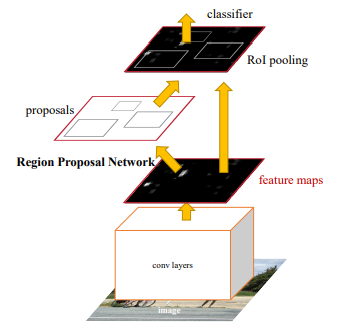

The region proposal network (RPN) takes feature maps generated by backbone network (ResNet50 in this project) as inputs and outputs regional proposals called anchor boxes. These archor boxes with different sizes and aspect ratios are ranked by possiblility of been a foreground and only top few (16 in this project) anchor boxes are passed as regional proposals to the next stage. After RPN, the Region of Interest pooling layer turns different size regional proposals to fixed-size feature maps. Then the feature maps are passed to a CNN to make predictions.

### Methods

The project started by creating custom dataset of images about people riding motorcycles with(or w/o) helmet. First, 2790 images about riding motorcycles were collected and downloaded from Google, Bing, and Flickr using a web crawler framework called icrawler[2]. Next, the 2790 images were reviewed by human and filted down to 1662 images that actually related to riding motorcycles. These images were then annotated manually using VoTT[3] annotation tool. Each image can be annotated with three possible tags if it contains the object(s): helmet, motorcycle, and person. Figure below shows the interface of VotTT and image with three tags. By the start of training, 438 images were tagged.

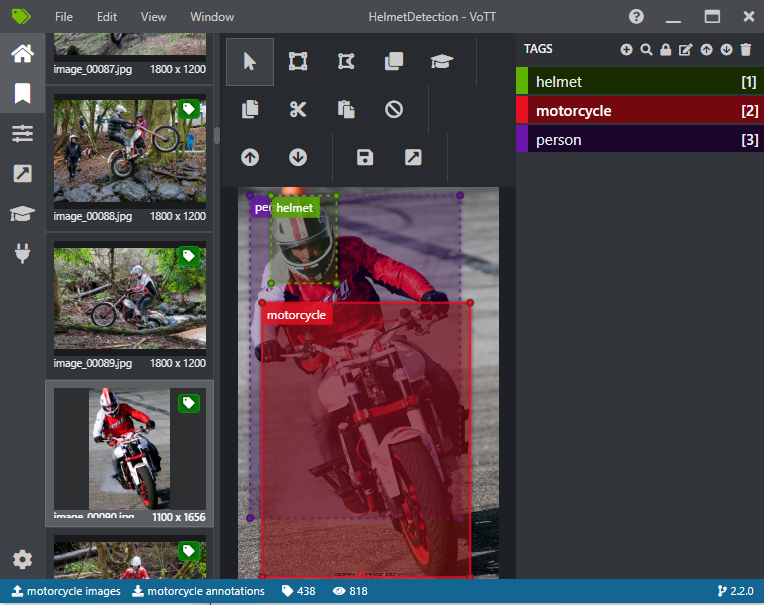 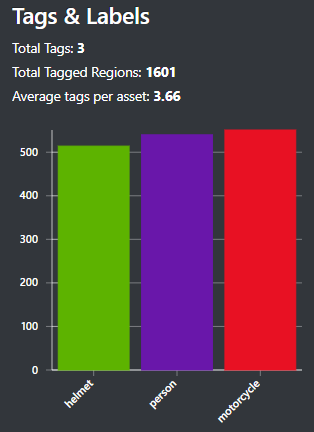

The tags were exported as a csv file containing following information: image(name), bouding box coordinates(xmin, ymin, xmax, ymax), and label, as shown in figure below.

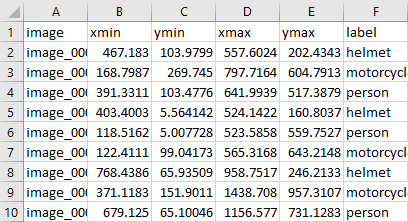

A HelmetDetection Dataset class which is a subclass of torch.utils.data.Dataset[4] class was created. Images were saved as tensors, bounding box and label information were in a dictionary. Then, the dataset was splitted into training set(80%) and test set(20%) randomly. To facilitate the training process, minibatches of train dataset were created using torch.utils.data.DataLoader[5]. Each minibatch contains two image datasets.

Faster R-CNN model was implemented using transfer learning. The Fater RCNN model(FASTERRCNN_RESNET50_FPN_V2)[6] from PyTorch along with the pretrained weights(FasterRCNN_ResNet50_FPN_V2_Weights), and pretrained backbone wieghts(ResNet50_Weights) were used as the start point of model for helmet detection. The box predictor layer which predicts the object classes and bounding box coordinates was replaced by a new FastRCNNPredictor. The box predictor layer ouputs 4 possible classes("background", "motorcycle", "person", "helmet") and 16 bounding boxes(4 x number of classes), orginally 91 classes and 364 bounding boxes. Not all the layers in this Faster R-CNN model needed training. The trained layers were Feature Pyramid Network(FPN) layers, Region Proposal NetWork(RPN) layers, and Region of Interest layers. The total number of parameters to be trained were 19758371. Data were fed to the model using training dataloader, and the model was trained on a cuda device.

### Experiments

The training dataset contained 350 sets of image and tags and batch size of training dataloader was 2. Therefore, one epoch is 175 iterations when training the model. Adam Optimizers with various learning rate were experimented and a learning rate of 0.00005 merged the best result. The model was trained with a duration of 4 epochs. The training loss and test loss were plotted against number of iterations as shown below.

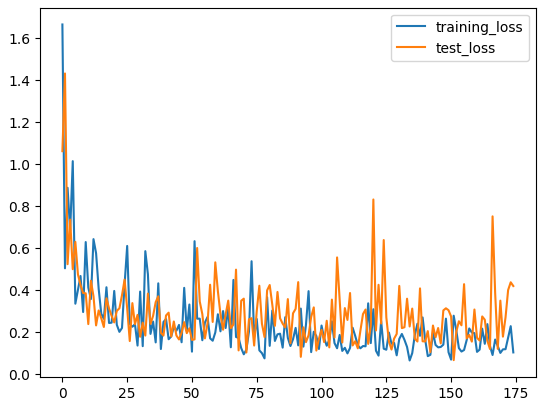

The model was then evaluated by predicting objects("motorcycle","person","helmet") in test images. The results were chaotic with redundant bounding boxes. This is because the model ouputs possible objects of all confidence level. Therefore, a non-maximum suppression[7] layer was added to refine the prediction. First, the predictions were filted by confidence level. Only predictions with confidence level of 80% or higher were kept. Then, the bounding boxes were checked for overlapping. If there were bounding boxes of same label with IOU(intersection area/union area) higher than 70%, then the two bounding boxes are considered overlapped and only bounding box with highest confidence score is kept. Figure below shows a comparison of predictions before and after non-maximum suppression.

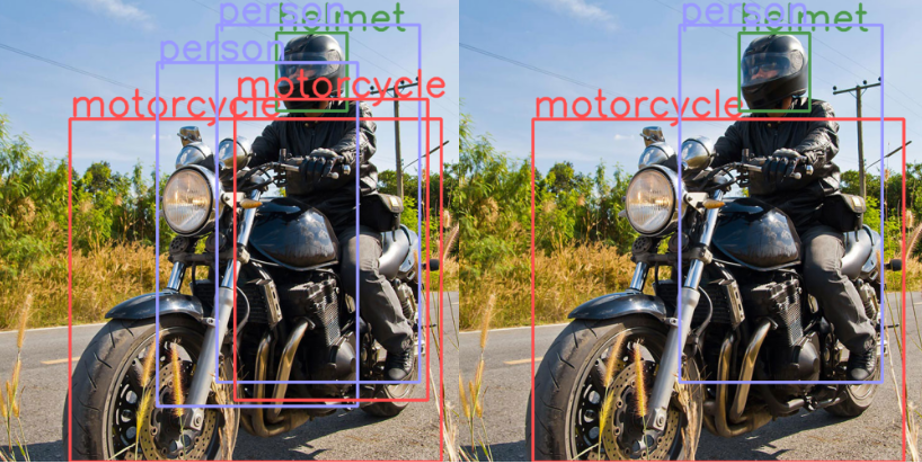
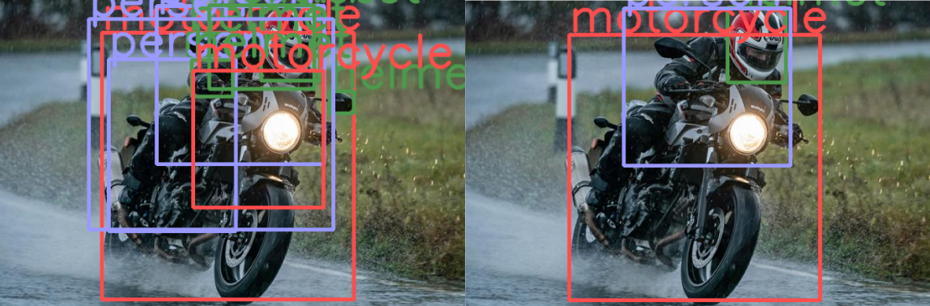
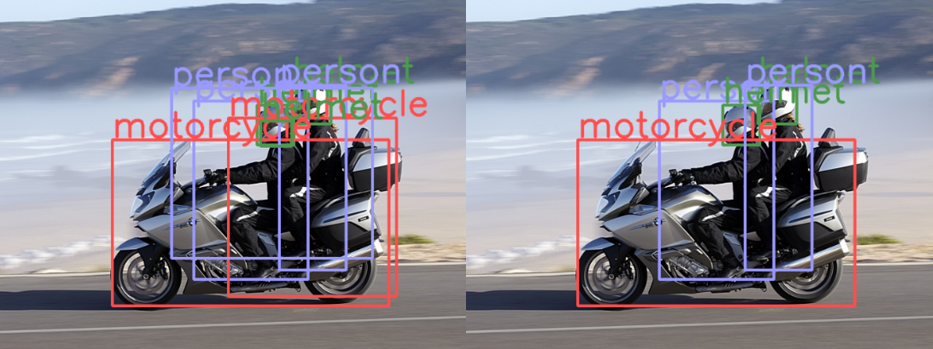

After refinement with non-maximum suppression, the model did a good job predicting objects("motorcycle","person","helmet"). However, there were still mislabeled objects observed, especially on the helmet category. The models seems to propose any object that has a semicircle to oval with large area of same color as a helmet. Examples are shown below.

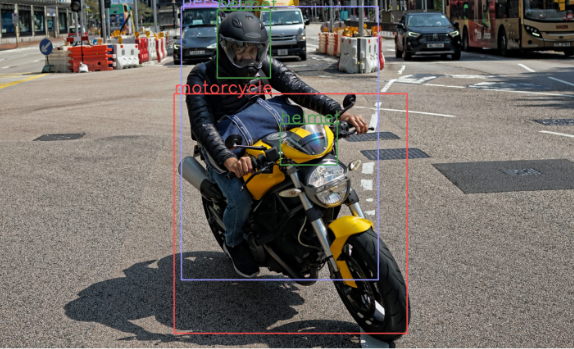 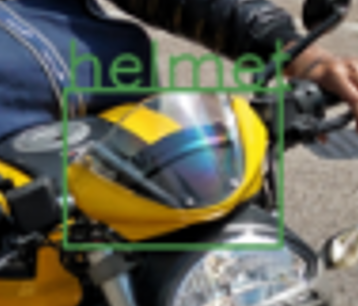
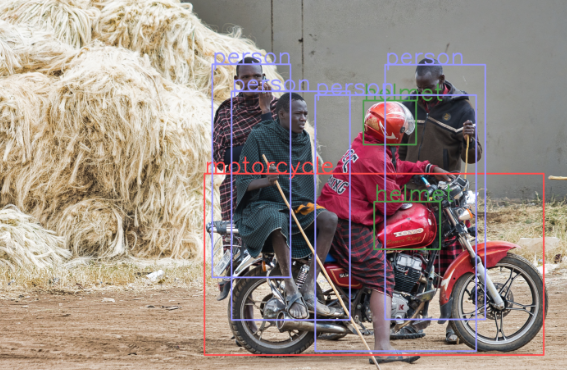 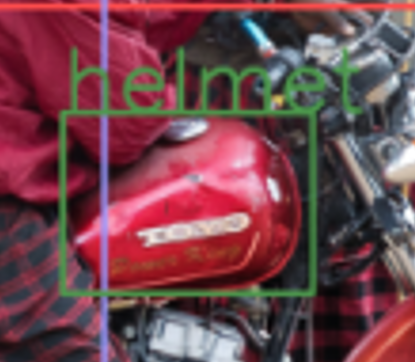
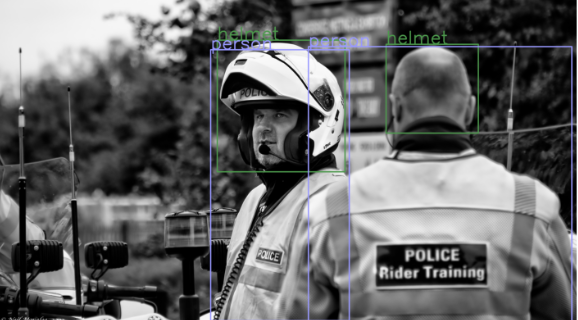 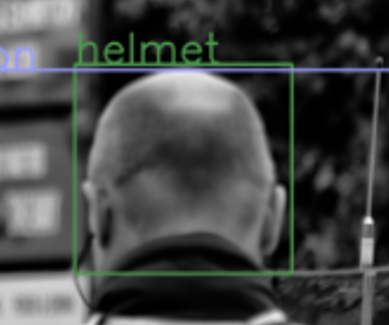

### Conclusions

In this porject, a Faster R-CNN model was trained to detect motorcycle, person, helmet in images. The model was build by fine-tuing a pretrained (on COCO) Faster R-CNN network with RestNet50 (pretrained on ImageNet-1K) backbone. A custom dataset that contains three possible tags("motorcycle","person","helmet") was used to train the Faster R-CNN model. And the predictions were refined using non-maximum suppression. The model predicts desired objects well but still needs imporvements. Potential works that may improve the performane are increase dataset size, particular more images of helmet, change the backbone CNN to other architectures, and experiments with different optimizers.

### References

[1] S. Ren, K. He, R. Girshick and J. Sun, "Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks," in IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 39, no. 6, pp. 1137-1149, 1 June 2017, doi: 10.1109/TPAMI.2016.2577031.

[2] K. Chen, "icrawler documentation," icrawler, https://icrawler.readthedocs.io/en/latest/ (accessed Dec. 8, 2022).

[3] W. Breza, "Visual Object Tagging Tool: An electron app for building end to end Object Detection Models from Images and Videos," GitHub, https://github.com/microsoft/VoTT (accessed Dec. 8, 2022)

[4] Torch Contributors, "SOURCE CODE FOR TORCH.UTILS.DATA.DATASET," PyTorch, https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html#Dataset (accessed Dec. 8, 2022)

[5] Torch Contributors, "SOURCE CODE FOR TORCH.UTILS.DATA.DATALOADER," PyTorch, https://pytorch.org/docs/stable/_modules/torch/utils/data/dataloader.html#DataLoader (accessed Dec. 8, 2022)

[6] Torch Contributors, "FASTER R-CNN," PyTorch, https://pytorch.org/vision/stable/models/faster_rcnn.html (accessed Dec. 8, 2022)

[7] J. Hosang, R. Benenson and B. Schiele, "Learning Non-maximum Suppression," 2017 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2017, pp. 6469-6477, doi: 10.1109/CVPR.2017.685.

